# Injective, surjective and invertible functions

Before we can proceed to talk about matrix inverses, we first briefly review some properties of functions. Given two sets $A$ and $B$, a function $f:A\to B$ mapping the set $A$ to the set $B$ is an operation such that for any $a\in A$, there exists a unique $b\in B$ for which $f(a) = B$. Here the set $A$ is called the **domain** of $f$, while the set $B$ is called the **co-domain** of $f$. Note that by definition, every $a\in A$ is associated with some output $b = f(a) \in B$, but importantly it need not be the case that _every_ $b\in B$ is the output associated with some input $a\in A$. That is, there may be some elements $b\in B$ such that there is no $a\in A$ for which $f(a) = b$. The set of elements $b\in B$ for which $b = f(a)$ for some $a\in A$ is called the **range** of $f$ (or sometimes called the _image_ of $f$) and is denoted

$$
\text{Range}(f) = \{b\in B : b = f(a) \text{ for some } a\in A\}.
$$

There are two special properties that a function $f:A\to B$ may or may not satisfy that will be relevant to us. These are _injectivity_ and _surjectivity_ (and _bijectivity_ when a function satisfies both).

|![](img/function_examples.png)|
|:--:|
|<b>Figure 1: Examples of injective, surjective and bijective functions.</b>|
## Injective functions and left inverses

The first property that we will discuss is injectivity. A function $f:A\to B$ is said to be **injective** if for every $a, a' \in A$ with $a\neq a'$, we have $f(a)\neq f(a')$. Equivalently, a function $f$ is injective if $f(a) = f(a')$ implies that $a=a'$. In words, a function is injective if for any two distinct inputs, we obtain two distinct outputs. Let's see a simple example of such a function. Intuitively, the existence of an injective map from $A\to B$ means that $A$ is "smaller" (or no bigger than) $B$, since we need at least as many elements in $B$ as in $A$ in order for each $a\in A$ to get mapped to a distinct output.

Consider the sets $A = \{a,b,c,d\}$ and $B = \{1,2,3,4,5\}$, and define the function (input-output mapping) as follows (illustrated in the top-left of Figure 1):

$$
\begin{align*}
f(a) &= 1\\ f(b) &= 5 \\ f(c) &= 2\\ f(d) &= 3
\end{align*}
$$

This function is injective, since any two distinct elements in $A$ get mapped to two distinct elements in $B$. Let's see perhaps a more familiar example. Consider the function $f:\mathbb{R}\to \mathbb{R}$ given by

$$
f(x) = \begin{cases}2x & \text{if } x\leq 0\\ x^2+5 & \text{if } x>0\end{cases} \hspace{20mm} (1)
$$
which we plot using the following.

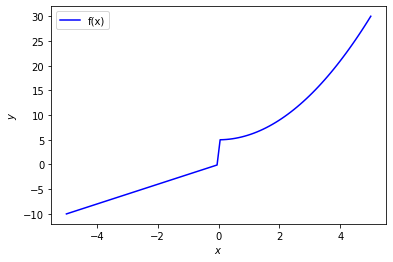

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    if x <= 0:
        return 2*x
    else:
        return x**2 + 5

xx = np.linspace(-5,5,100)
fxx = [f(x) for x in xx]

plt.plot(xx, fxx, color='blue', label='f(x)')
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.legend()
plt.show()

Inspecting this function visually, we see that since this function is strictly monotone increasing, it satisfies the condition that any two distinct inputs get mapped to two outputs, and hence is an injective function (indeed, in one dimension all injective functions are monotone). On the other hand, the function $f(x) = x^2$ is _not_ an injective function since, for example, $x= -\sqrt{2}$ and $x=\sqrt{2}$ get mapped to the same output, $f(x) = 2$.

Injective functions are special in that they always come with (at least one) special complementary function called a **left inverse**. A left inverse for a function $f:A\to B$ is a function $g:B\to A$ such that for and $x\in A$ we have

$$
(g\circ f)(x) = g(f(x)) = x.
$$

Here the notation $g\circ f$ means "$g$ composed with $f$" and is by definition the function $g\circ f: A\to A$ defined by $g(f(x))$. If $g$ is a left inverse for $f$, then the above condition states that $g\circ f$ is the _identity function_. Let's see an example of a left inverse for the injective function $f$ defined in Figure 1. Consider the function $g:B\to A$ defined by

$$
\begin{align*}
g(1) & = a\\
g(5) &= b\\
g(2) &= c\\
g(3) &= d\\
g(4) &= a
\end{align*}
$$

We see that by definition $g(f(a)) =a, g(f(b)) = b, g(f(c))=c$ and $g(f(d)) =d$, so in particular it is indeed the case that $g\circ f$ is the identity function on $A$ and hence $g$ is a left inverse for $f$. Let's also see an example of a left inverse for the function defined in equation $(1)$. For example consider the function $g:\mathbb{R}\to \mathbb{R}$ defined by

$$
g(y) = \begin{cases}\frac{1}{2}y &\text{if } y\leq 0\\ 3.14159 & \text{if } 0<y<5\\ \sqrt{y-5} & \text{if }y\geq 5 \end{cases}.
$$

Lets plot this function and the function $g\circ f$ to verify that it is indeed a left inverse.

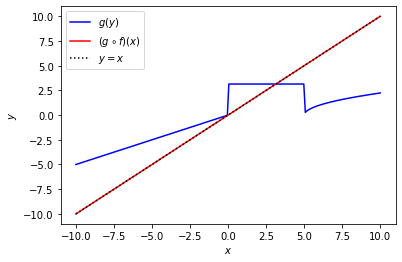

In [2]:
def g(y):
    if y <= 0:
        return 0.5*y
    elif (y > 0) and (y < 5):
        return 3.14159
    else:
        return np.sqrt(y-5)

yy = np.linspace(-10,10,200)
xx = np.linspace(-10,10,100)

gyy = [g(y) for y in yy]
gfxx = [g(f(x)) for x in xx]

plt.plot(yy, gyy, label=r'$g(y)$', color='blue')
plt.plot(xx, gfxx, label=r'$(g\circ f)(x)$', color='red')
plt.plot(xx, xx, label=r'$y=x$', linestyle='dotted', color='black')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

Notice that the graph of the function $(g\circ f)(x)$ is just the $y=x$ line, indicating that $g\circ f$ is indeed the identity function, and hence $g$ is in fact a left inverse for $f$. We haven't addressed an oddity in the definition of $g$: why did we pick $g(y) = 3.14159$ for $y\in (0,5)$? Well it turns out it doesn't matter at all what we choose $g$ to do in the range, in fact we could have defined it however we wanted. For example, the function

$$
\tilde{g}(y) = \begin{cases}\frac{1}{2}y & \text{if } y\leq 0\\ \sin(10y)+y & \text{if } 0<y<5 \\ \sqrt{y-5} & \text{if }y\geq 5 \end{cases}.
$$

is also a perfectly valid left inverse for $f$. Let's verify this with code as well.

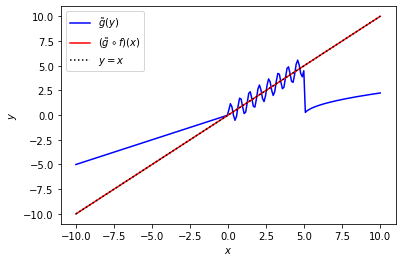

In [3]:
def gtilde(y):
    if y <= 0:
        return 0.5*y
    elif (y > 0) and (y < 5):
        return np.sin(10*y)+y
    else:
        return np.sqrt(y-5)

yy = np.linspace(-10,10,200)
xx = np.linspace(-10,10,100)

gyy = [gtilde(y) for y in yy]
gfxx = [gtilde(f(x)) for x in xx]

plt.plot(yy, gyy, label=r'$\tilde{g}(y)$', color='blue')
plt.plot(xx, gfxx, label=r'$(\tilde{g}\circ f)(x)$', color='red')
plt.plot(xx, xx, label=r'$y=x$', linestyle='dotted', color='black')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

The reason for the redundancy is that the range of $f$ is not equal to all of $\mathbb{R}$: all we required out of a left inverse is that for every value of $x$, $g$ maps $f(x)$ back to $x$. For any values of $y$ that are not in the range of $f$, the function $g$ can do anything. This redundancy can be resolved by requiring that the function $f$ has another property -- called _surjectivity_ -- which we discuss next.

## Surjective functions and right inverses
A function $f:A\to B$ is said to be **surjective** if for every $b \in B$ there exists $a\in A$ such that $f(a) = B$. Equivalently, a function $f:A\to B$ is surjective if $\text{range}(f) = B$. Intuitively, a surjective function from $A$ to $B$ means that $A$ is "bigger" (or no smaller) than $B$.

For example, see the function $f:A\to B$ defined in the top-right of Figure 1: this function is clearly surjective, as every point in $B = \{1,2,3,4\}$ is mapped to by some point in $A = \{a,b,c,d,e\}$. Let's see a more realistic example. Consider the function $f:\mathbb{R}\to \mathbb{R}$ defined by

$$
f(x) = \begin{cases}-2x-4 & \text{if } x\leq -2\\
0 & \text{if } -2< x <2\\ -(x-2)^2 & \text{if } x \geq 2 \end{cases} \hspace{20mm} (2)
$$

Let's plot this function to see what it looks like.

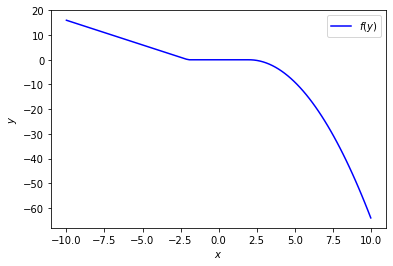

In [4]:
def f(x):
    if x <= -2:
        return -2*x-4
    elif (x > -2) and (x < 2):
        return 0
    else:
        return -(x-2)**2

xx = np.linspace(-10,10,100)

fxx = [f(x) for x in xx]

plt.plot(xx, fxx, label=r'$f(y)$', color='blue')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

This function is clearly surjective as any value $y\in \mathbb{R}$ is mapped to by some $x\in \mathbb{R}$. However it is clearly _not_ injective, since any $x\in[-2,2]$ gets mapped to the same value: $0$. Similar to injective functions, surjective functions come with special complementary functions called **right inverses**. A right inverse for a function $f:A\to B$ is a function $g:B\to A$ such that for all $y\in B$ we have

$$
(f\circ g)(y) = f(g(y)) = y.
$$

That is, a right inverse for $f$ is a function $g$ such that $f\circ g$ is the identity function on the set $B$. Let's find a right inverse for the function $f$ defined in equation $(2)$. For example, we could choose:

$$
g(y) = \begin{cases} 2+\sqrt{-y} & \text{if } y < 0\\
1.2 & \text{if } y=0 \\ -\frac{y+4}{2} & \text{if } y > 0 \end{cases}
$$

Let's plot this function and the composition $f\circ g$.

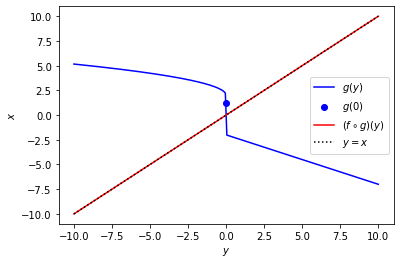

In [5]:
def g(y):
    if y < 0:
        return 2+np.sqrt(-y)
    elif y==0:
        return 1.2
    else:
        return -(y+4)/2

yy = np.linspace(-10,10,200)

gyy = [g(y) for y in yy]
fgyy = [f(g(y)) for y in yy]

plt.plot(yy, gyy, label=r'$g(y)$', color='blue')
plt.scatter(0, g(0), label=r'$g(0)$', color='blue')
plt.plot(yy, fgyy, label=r'$(f\circ g)(y)$', color='red')
plt.plot(yy, yy, label=r'$y=x$', linestyle='dotted', color='black')
plt.xlabel(r'$y$')
plt.ylabel(r'$x$')
plt.legend()
plt.show()

As we can see, $f\circ g$ is indeed the identity function, so $g$ is a valid right inverse. So why did we choose the value $g(0) = 1.2$? Like with the left inverse, there are many values we could have chosen for $g(0)$: it just needs to be some value that $f$ would have mapped to $0$, which is any value in $[-2,2]$. So really we can get a whole variety of right inverses by choosing $g(0)$ to be different values in $[-2,2]$.

Before proceeding, it's important to note that the function $g$ we defined above is _not_ also a left inverse for $f$. Let's plot this to verify.

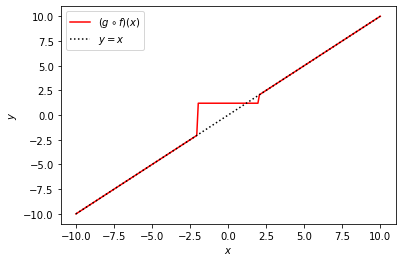

In [6]:
xx = np.linspace(-10,10,200)

gfxx = [g(f(x)) for x in xx]

plt.plot(xx, gfxx, label=r'$(g\circ f)(x)$', color='red')
plt.plot(xx, xx, label=r'$y=x$', linestyle='dotted', color='black')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

We see that $g\circ f$ is not equal to the identity, and so $g$ is definitely not a left inverse for $f$. Indeed, because the function $f$ is not injective, it does not have any left inverses. As we will see next, there are some special functions which are both injective _and_ surjective, called bijective functions, which have a complementary function, called an inverse, which is both a left and right inverse.

## Bijective and invertible functions

So far we've seen what injective and surjective functions are, and that they come with left and right inverses, respectively. A **bijective** function is a function which is both injective _and_ surjective. More explicitly, a function $f:A\to B$ is a function such that 1) for every $x,x' \in A$ with $x\neq x'$, $f(x) \neq f(x')$ and 2) for every $y\in B$, there is $x\in A$ such that $f(x) = y$. Intuitively, this means that there is a one-to-one correspondence between points in $A$ and points in $B$ (indeed, bijective functions are often called "one-to-one"). See the bottom graphic in Figure 1 for a simple example of a bijective function.

Since a bijective function $f$ is injective and surjective, it has both a left and right inverse. Indeed, it turns out that these two inverses are the same thing, and this function is just called the _inverse_ of $f$. Thus, bijective functions are often called invertible functions. Let's see an example. Consider the function $f:\mathbb{R}\to\mathbb{R}$ defined by $f(x) = x^3$. Then the function $f^{-1}(x) = x^{1/3}$ is both a left and right inverse for $f$.

In the next sections, we will apply the ideas introduced here to linear functions of the form

$$
f(\boldsymbol{x}) = \boldsymbol{Ax}
$$

where $\boldsymbol{A}$ is an $m\times n$ matrix, and use them to understand when a _matrix_ is invertible, or has a left or right inverse.